<a href="https://colab.research.google.com/github/dragonraider700/TCS-Rep/blob/main/TCSDiamondsCodeblock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


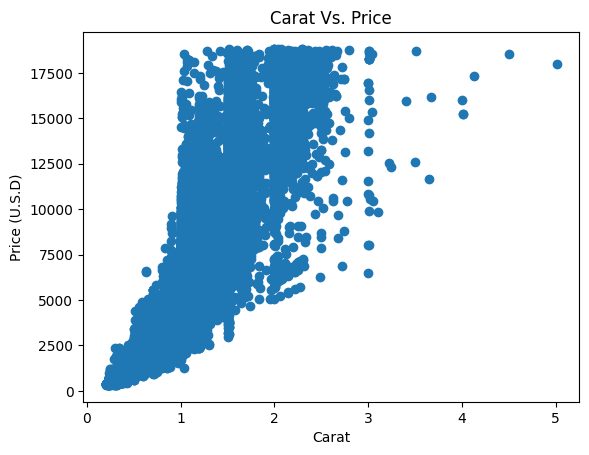

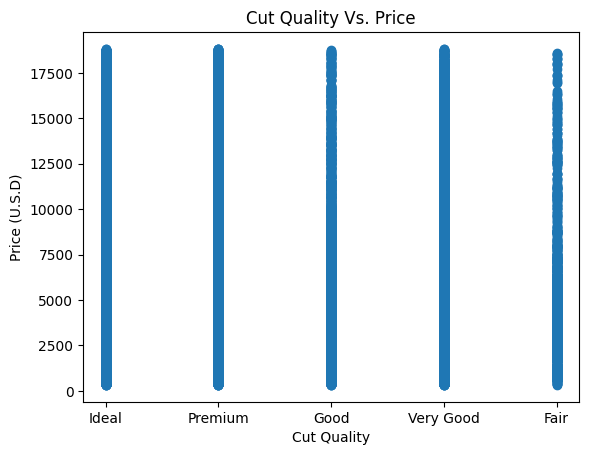

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1   group2   meandiff p-adj    lower      upper   reject
--------------------------------------------------------------
   Fair      Good -429.8933 0.0015  -740.4593 -119.3273   True
   Fair     Ideal -901.2158    0.0 -1180.5808 -621.8507   True
   Fair   Premium  225.4999 0.1951   -59.2763  510.2762  False
   Fair Very Good -376.9979 0.0031  -663.8719  -90.1239   True
   Good     Ideal -471.3225    0.0  -642.3685 -300.2765   True
   Good   Premium  655.3933    0.0   475.6451  835.1414   True
   Good Very Good   52.8954 0.9341  -130.1581  235.9489  False
  Ideal   Premium 1126.7157    0.0  1008.8048 1244.6267   True
  Ideal Very Good  524.2179    0.0    401.327  647.1088   True
Premium Very Good -602.4978    0.0  -737.2377 -467.7579   True
--------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


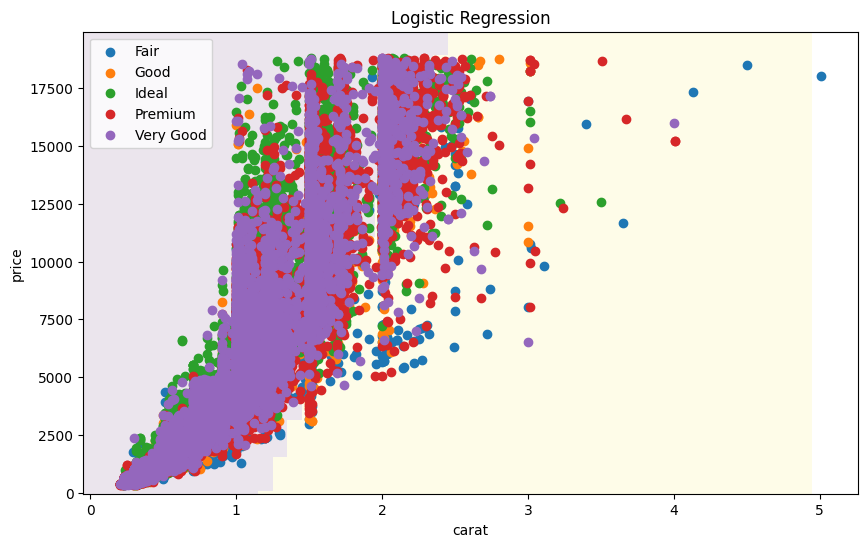

Accuracy Score:  0.40118650352243235


In [1]:
#from !pip to from sklearn import, imports our libraries
!pip install matplotlib
import matplotlib.pyplot as plt

!pip install pandas
import pandas as pd

!pip install numpy
import numpy as np

from sklearn import datasets, model_selection

#Loads multi-comparsion module from statsmodels
import statsmodels.stats.multicomp as mc

#Imports machine learning model.
from sklearn.linear_model import LinearRegression

#Everything below loads in raw data.
url = "https://raw.githubusercontent.com/the-codingschool/datasets/refs/heads/main/diamonds.csv"
data = pd.read_csv(url)

df = data[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']]

print(df)

#Deciding independent and dependent variables
features = ["carat"]
target = ["price"]

#Scatterplot code
diamond_carat = df["carat"]
diamond_price = df["price"]

plt.scatter(diamond_carat, diamond_price)
plt.title("Carat Vs. Price")
plt.xlabel("Carat")
plt.ylabel("Price (U.S.D)")
plt.show()

#Scatterplot code
diamond_carat = df["cut"]
diamond_price = df["price"]

plt.scatter(diamond_carat, diamond_price)
plt.title("Cut Quality Vs. Price")
plt.xlabel("Cut Quality")
plt.ylabel("Price (U.S.D)")
plt.show()

comp = mc.MultiComparison(df['price'], df['cut'])
result = comp.tukeyhsd()
print(result.summary())

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['cut_encoded'] = label_encoder.fit_transform(df['cut'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(df[['carat', 'price']], df['cut_encoded'], test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

#Fit to training set.
model.fit(X_train, y_train)

#Tests on training set
pred = model.predict(X_test)

fig, ax = plt.subplots(figsize=(10, 6))
xx, yy = np.meshgrid(np.arange(0, 5, 0.1), np.arange(0, 20000, 100))
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

# Now z is numeric — good for pcolormesh
ax.pcolormesh(xx, yy, z, alpha=0.1)

for label, data in df.groupby('cut_encoded'):
    ax.scatter(data['carat'], data['price'],
               label=label_encoder.inverse_transform([label])[0])

ax.set_title('Logistic Regression')
ax.set_xlabel('carat')
ax.set_ylabel('price')
ax.legend()
plt.show()

from sklearn import metrics
accuracy_score = metrics.accuracy_score(y_test, pred)
print("Accuracy Score: ", accuracy_score)